In [1]:
import numpy as np
from numba import jit

import vpython as vp
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import ipywidgets as ipy

import numpy.random as rd

<IPython.core.display.Javascript object>

# TP2

## Exercício 1

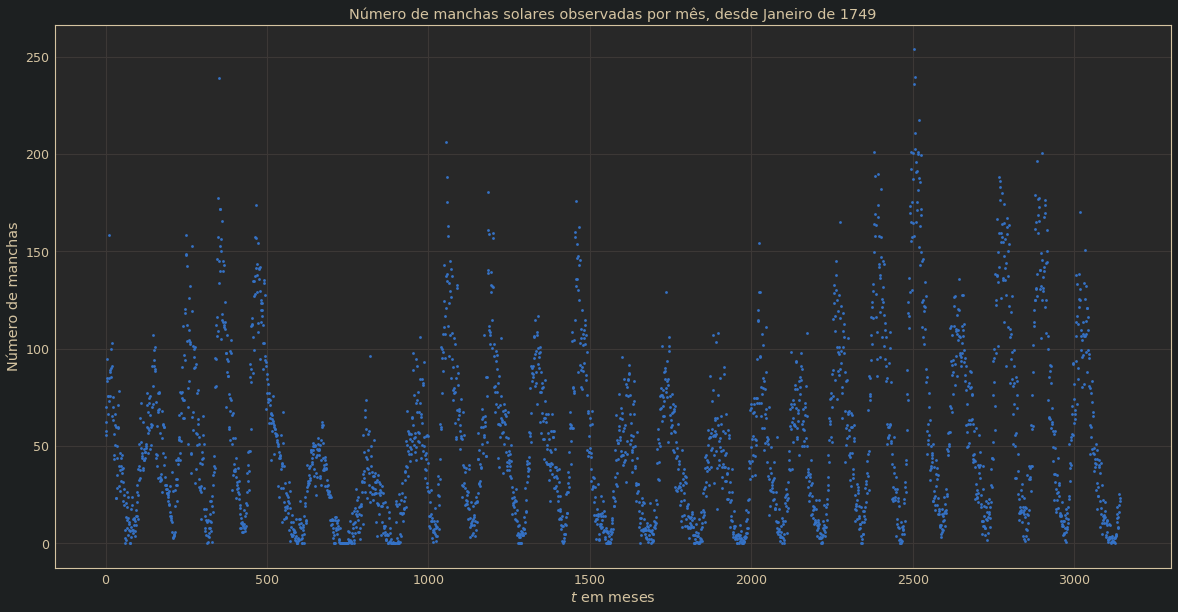

In [13]:
# Alínea 1

# Import the sunspots data, extract coordinates
sunspot_data = np.loadtxt("sunspots.txt",float)
x = sunspot_data[:,0]
y = sunspot_data[:,1]

plt.figure(figsize=(20,10))
plt.title("Número de manchas solares observadas por mês, desde Janeiro de 1749")
plt.xlabel("$t$ em meses")
plt.ylabel("Número de manchas")
plt.plot(x,y,'.')
plt.show()

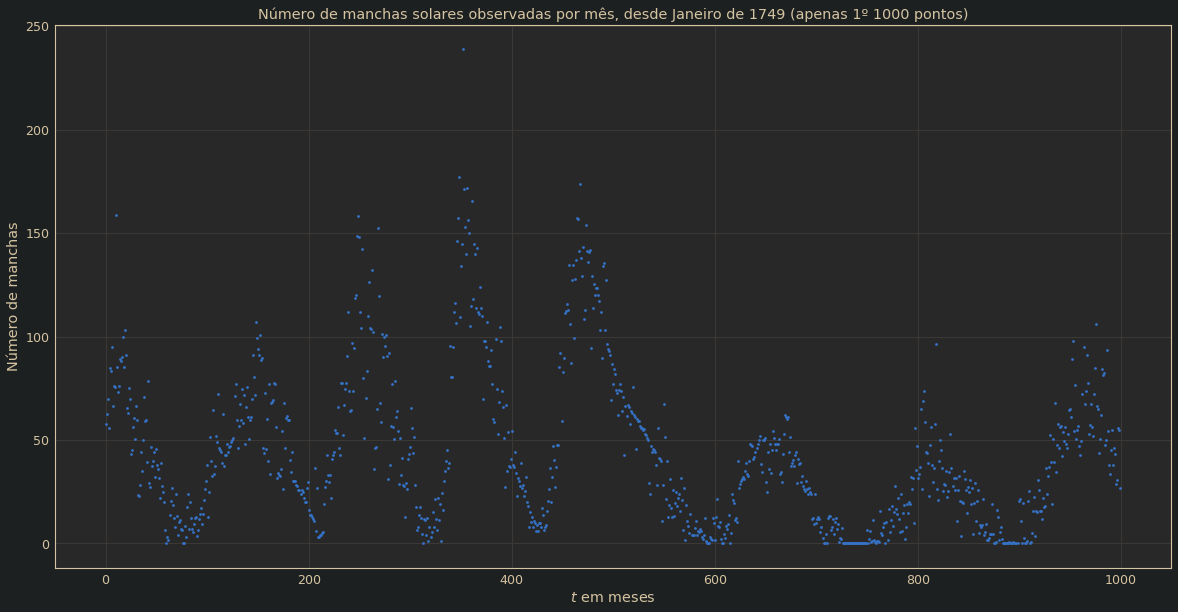

In [14]:
# Alínea 2

# Just the first 1000 data points
x2 = x[:1000]
y2 = y[:1000]

# Draw the graphic
plt.figure(figsize=(20,10))
plt.title("Número de manchas solares observadas por mês, desde Janeiro de 1749 (apenas 1º 1000 pontos)")
plt.xlabel("$t$ em meses")
plt.ylabel("Número de manchas")
plt.plot(x2,y2,'.')
plt.show()

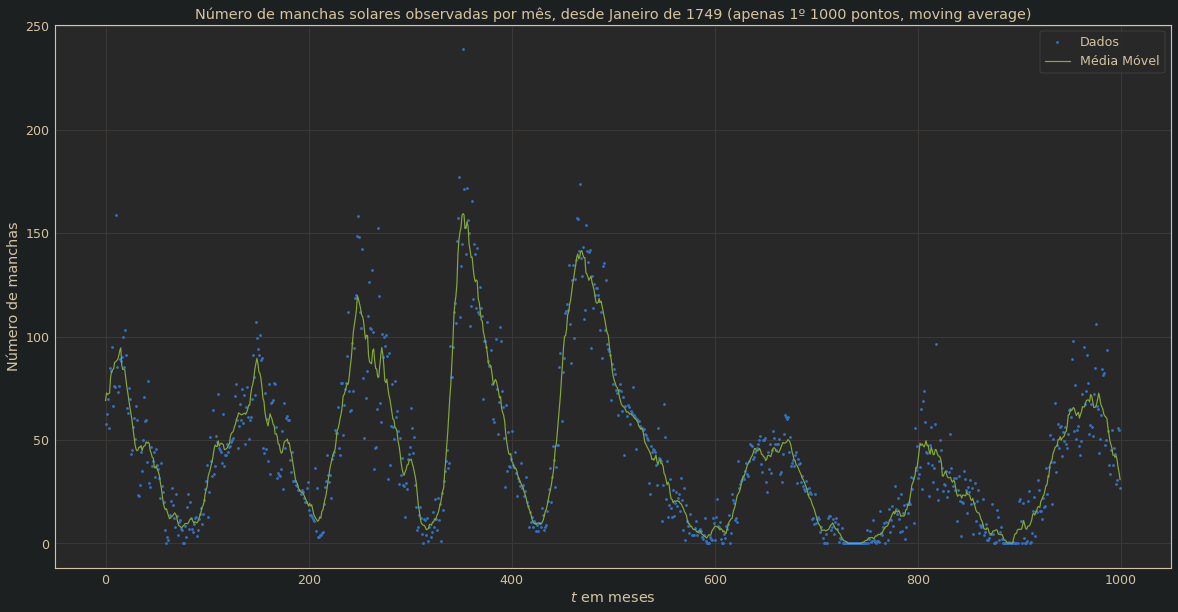

In [15]:
# Alínea 3

# IMPORTANT: we're not checking whether len(arr) < r, the caller should only provides with data we can handle
def moving_average(r,k,arr):
    if k < r:
        return (1/len(arr[:k+r+1]))*sum(arr[:k+r+1])
    elif k > len(arr) - r:
        return (1/len(arr[k-r:]))*sum(arr[k-r:])
    else:
        return (1/(2*r+1))*sum(arr[k-r:k+r+1])

# Using x and y again, to calculate the averages
y_mov_average = np.empty(1000)
for i in range(1000):
    y_mov_average[i] = moving_average(5,i,y)

# Draw the graph
plt.figure(figsize=(20,10))
plt.title("Número de manchas solares observadas por mês, desde Janeiro de 1749 (apenas 1º 1000 pontos, moving average)")
plt.xlabel("$t$ em meses")
plt.ylabel("Número de manchas")
plt.plot(x[:1000],y[:1000],'.',label="Dados")
plt.plot(x[:1000],y_mov_average,label="Média Móvel")
plt.legend()
plt.show()

In [16]:
def plot(r):
    for i in range(1000):
        y_mov_average[i] = moving_average(r,i,y)
    plt.figure(figsize=(20,10))
    plt.title("Número de manchas solares observadas por mês, desde Janeiro de 1749 (apenas 1º 1000 pontos, moving average)")
    plt.xlabel("$t$ em meses")
    plt.ylabel("Número de manchas")
    plt.plot(x[:1000],y[:1000],'.',label="Dados")
    plt.plot(x[:1000],y_mov_average,label="Média Móvel")
    plt.legend()
    plt.show()


ipy.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

ipy.interact(plot, r=5)


interactive(children=(IntSlider(value=5, description='r', max=15, min=-5), Output()), _dom_classes=('widget-in…

<function __main__.plot(r)>

## Exercício 2

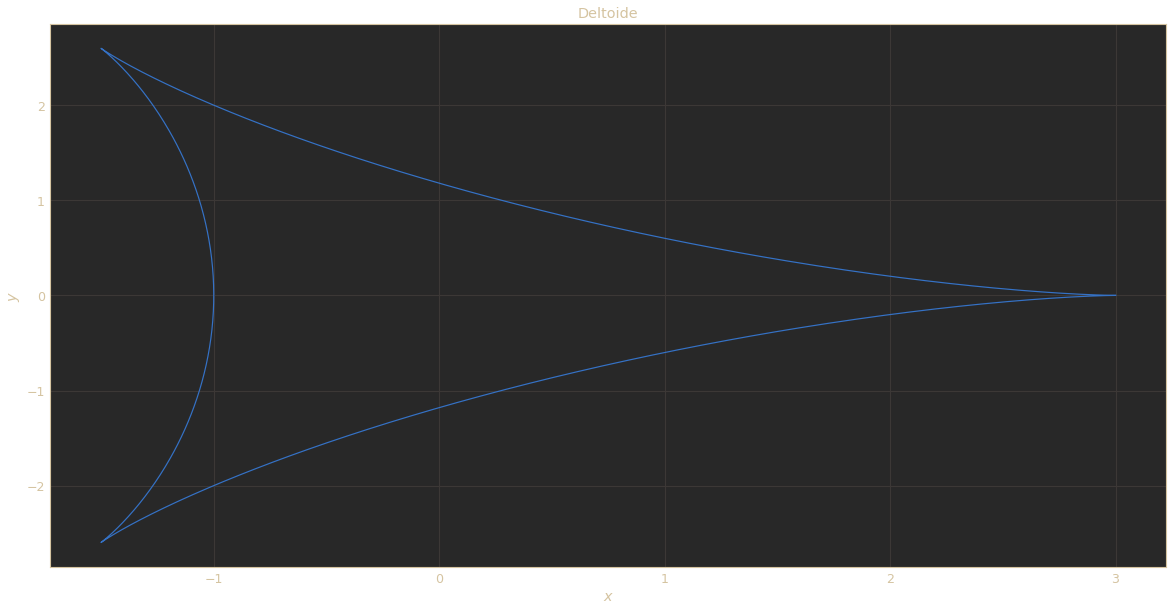

In [30]:
# Alínea 1

def x_deltoide(theta):
    return 2*np.cos(theta)+np.cos(2*theta)

def y_deltoide(theta):
    return 2*np.sin(theta)-np.sin(2*theta)

# Calculate x and y arrays
theta = np.linspace(0,2*np.pi,num=800)
x = x_deltoide(theta)
y = y_deltoide(theta)

# Draw the graph
plt.figure(figsize=(20,10))
plt.title("Deltoide")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.plot(x,y)
plt.show()

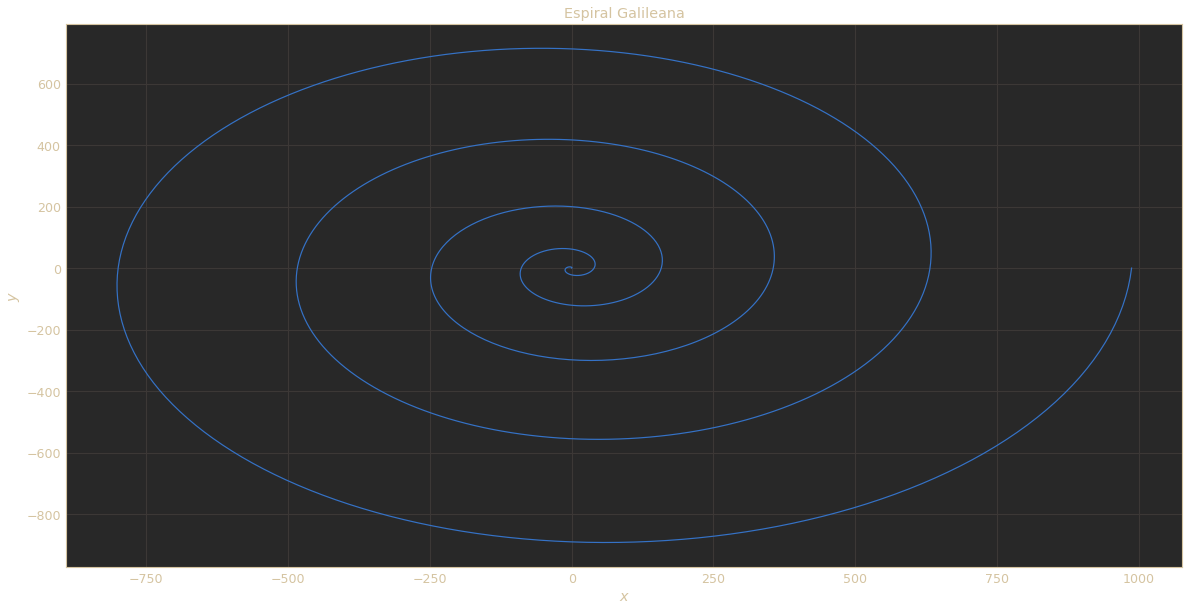

In [32]:
# Alínea 2

# Define the functions for x and y in terms of theta (the inputs are in the form r=f(theta), f is an arbitrary function)
def x_from_polar(theta,func):
    return func(theta)*np.cos(theta)

def y_from_polar(theta,func):
    return func(theta)*np.sin(theta)

def func(theta):
    return theta**2

# Calculate x and y arrays
theta = np.linspace(0,10*np.pi,num=1000)
x = x_from_polar(theta,func)
y = y_from_polar(theta,func)

# Draw the graph
plt.figure(figsize=(20,10))
plt.title("Espiral Galileana")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.plot(x,y)
plt.show()

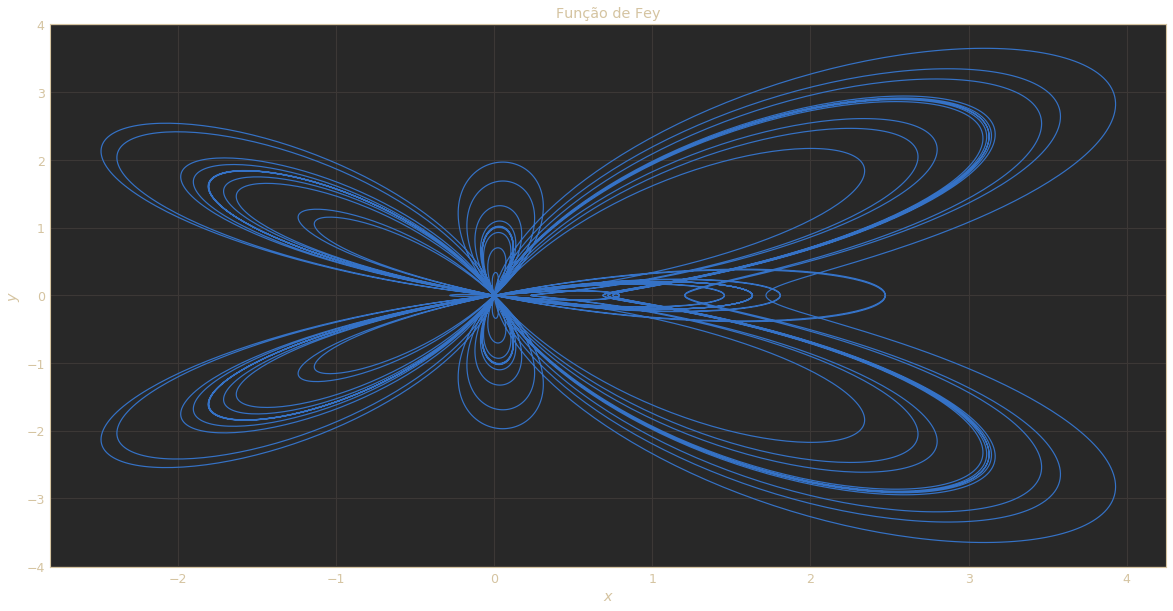

In [35]:
# Alínea 3

def func2(theta):
    return np.exp(np.cos(theta)) - 2*np.cos(4*theta)+np.sin(theta/12)**5

# Calculate x and y arrays
theta = np.linspace(0,24*np.pi,num=10000)
x = x_from_polar(theta,func2)
y = y_from_polar(theta,func2)

# Draw the graph
plt.figure(figsize=(20,10))
plt.title("Função de Fey")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.plot(x,y)
plt.show()

## Exercício 3

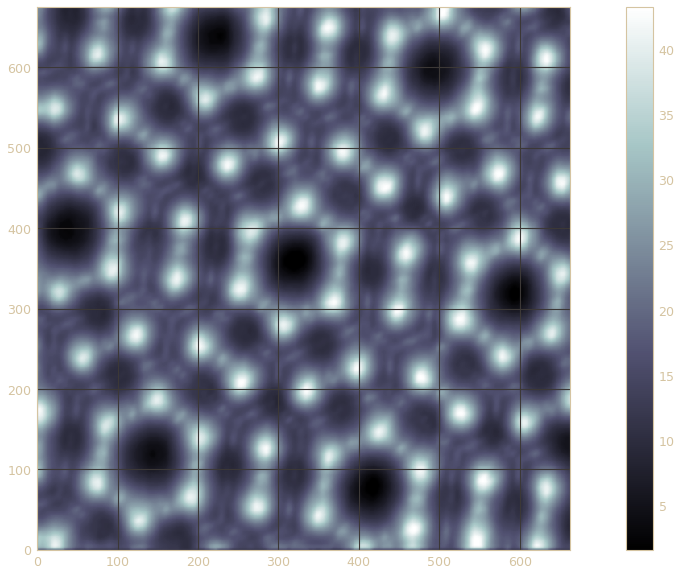

In [50]:
stm_data = np.loadtxt("stm.txt",float)

# Draw the graph
plt.figure(figsize=(20,10))
plt.imshow(stm_data.T,origin="lower")
plt.bone()
plt.colorbar()
plt.show()

## Exercício 6

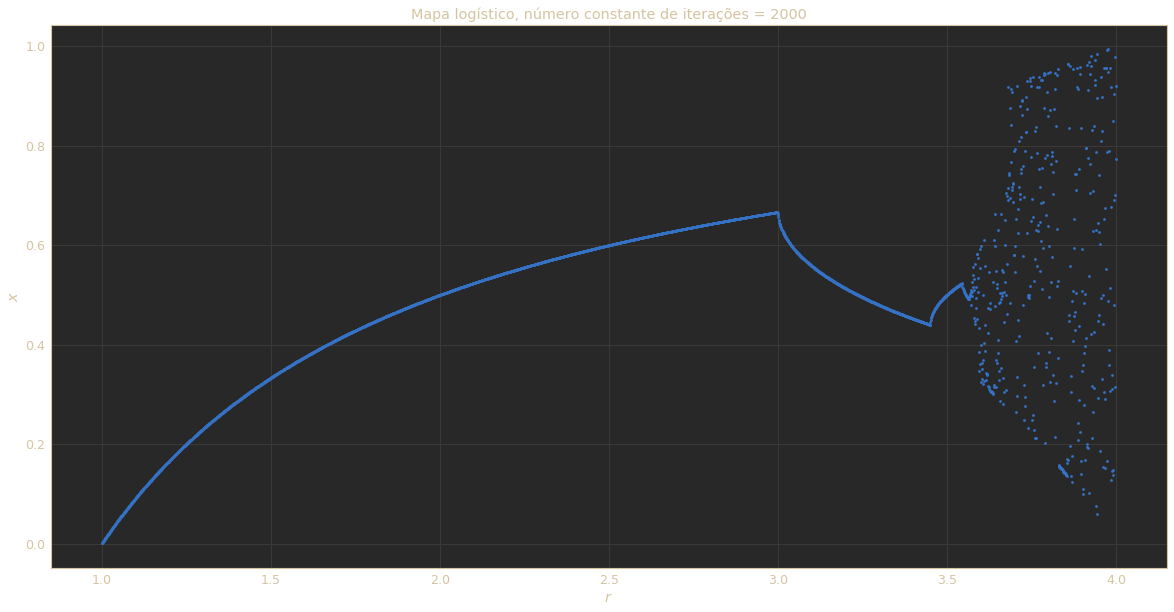

In [2]:
# Mapa logístico, número constante de iterações

def logistic_map(r, iter_num):
    # Create an x array equal to r
    x = 0.5 + 0.*r
    
    # Iterate iter_num times
    for i in range(iter_num):
        x = r*x*(1-x)
    return x

iter_num = 2000 # Iteration number for each point, fixed

# Create the display arrays
r_array = np.arange(1,4,0.001)
y_array = logistic_map(r_array,iter_num)

# Draw the graph
plt.figure(figsize=(20,10))
plt.title("Mapa logístico, número constante de iterações = "+str(iter_num))
plt.xlabel("$r$")
plt.ylabel("$x$")
plt.plot(r_array,y_array,'.')
plt.show()

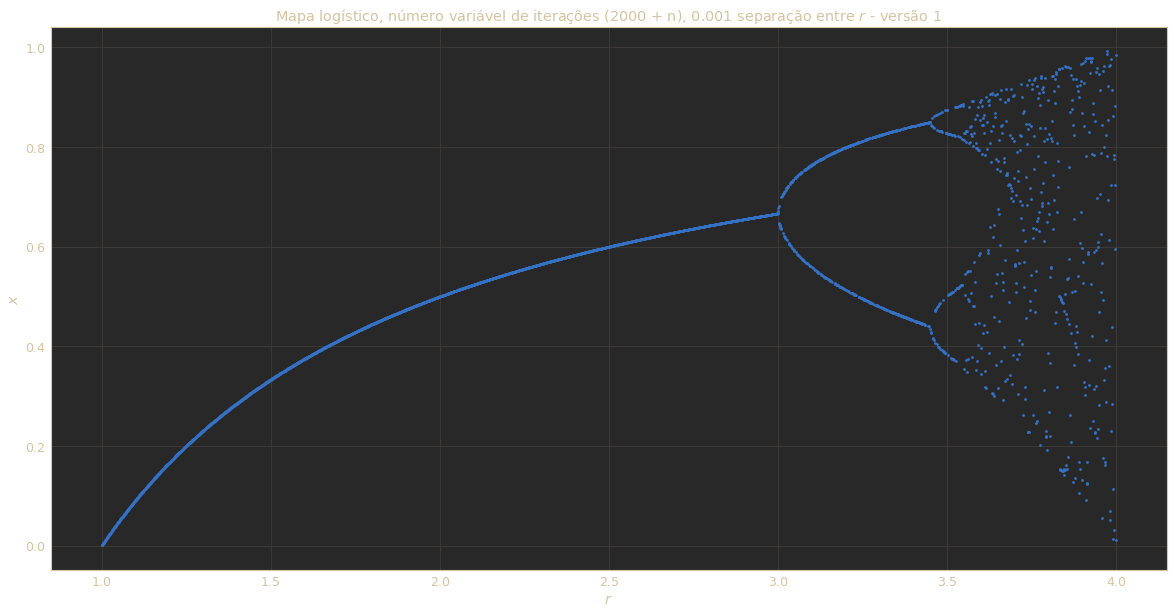

In [5]:
# Mapa logístico, número variável de iterações, versão 1

# Takes arguments r (int), number of initial iterations (initial_iter, int), and the range for the random number of iterations
def logistic_map(r, num_iter):
    x = 0.5
    # Iterate iter_num + random number of times
    for i in range(num_iter):
        x = r*x*(1-x)
    return x

# Create the display arrays
r_array = np.arange(1,4,0.001)
y_array = np.empty(r_array.size)
rand_array = rd.randint(1000,2000,r_array.size) + 1000 # Number of iterations per point

# Iterate over rand_array, and use y iterated rand[i] times
for i,rand in enumerate(rand_array):
    y_array[i] = logistic_map(r_array[i],rand)

plt.figure(figsize=(20,10))
plt.title("Mapa logístico, número variável de iterações (2000 + n), 0.001 separação entre $r$ - versão 1")
plt.xlabel("$r$")
plt.ylabel("$x$")
plt.plot(r_array,y_array,'.')
plt.show()

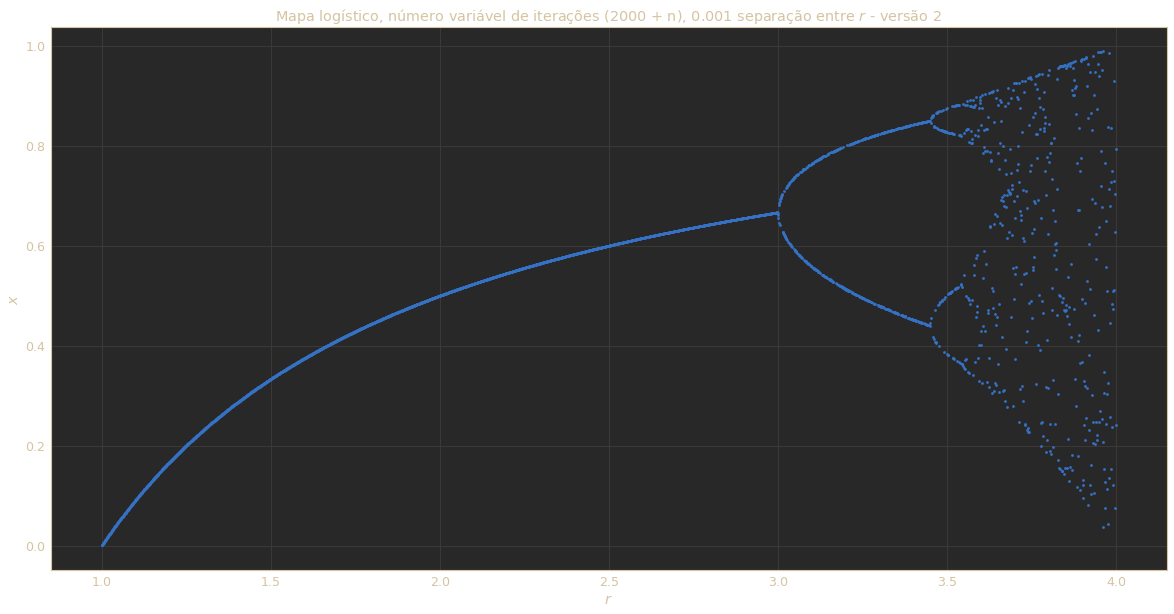

In [6]:
# Mapa logístico, número variável de iterações, versão 2
# Ligeiramente diferente, em vez de usarmos uma lista com o número de iterações para cada y, calculamos na altura
# MAIS EFICIENTE, somehow

def logistic_map(r, initial_iter, show_iter):
    # Create an x array equal to r
    x = 0.5
    
    # Iterate iter_num times
    for i in range(initial_iter+show_iter):
        x = r*x*(1-x)
    return x

# Create the display arrays
r_array = np.arange(1,4,0.001)
y_array = np.empty(len(r_array))


# Iterate over r, use y iterated a random numer of times (calculated on each funtion call)
for i,r in enumerate(r_array):
    y_array[i] = logistic_map(r,1000,np.random.randint(1000,2000))

# Draw the graph
plt.figure(figsize=(20,10))
plt.title("Mapa logístico, número variável de iterações (2000 + n), 0.001 separação entre $r$ - versão 2")
plt.xlabel("$r$")
plt.ylabel("$x$")
plt.plot(r_array,y_array,'.')
plt.show()

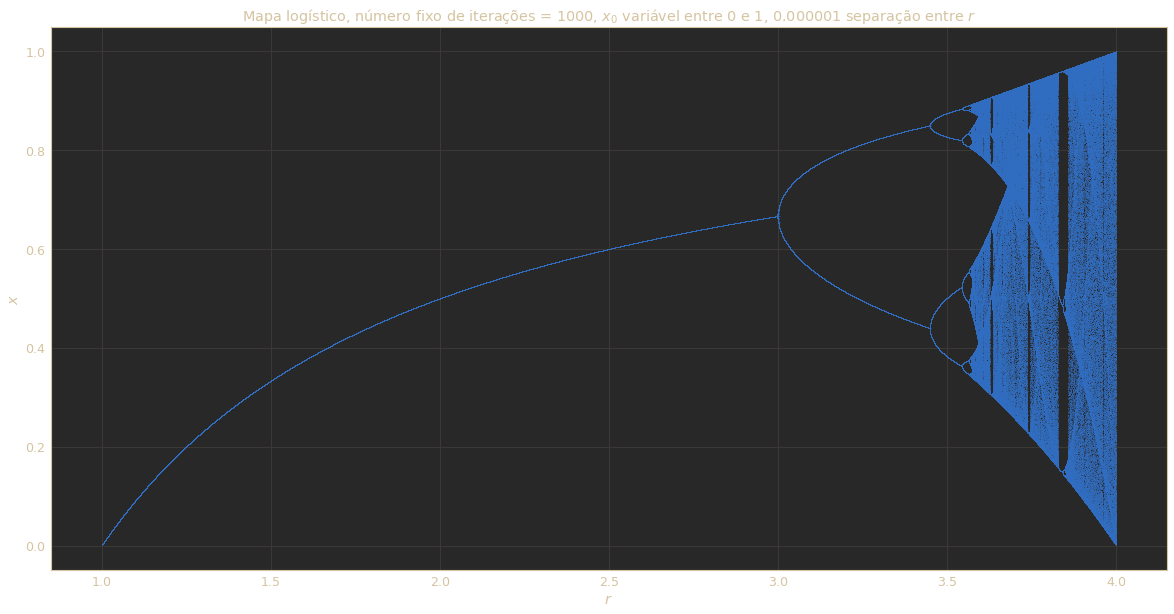

In [7]:
# Mapa logístico, x inicial variável
# O resultado é o mesmo se variarmos o x inicial, mas com isto conseguimos usar os arrays do numpy e é muito mais rápido

# Create the display arrays
r_array = np.arange(1,4,0.000001)
y_array = rd.random(r_array.size) # Random initial value between 0 and 1

# Iterate a fixed number of times
for i in range(1000):
    y_array = r_array*y_array*(1-y_array)

# Draw the graph
plt.figure(figsize=(20,10))
plt.title("Mapa logístico, número fixo de iterações = 1000, $x_0$ variável entre 0 e 1, 0.000001 separação entre $r$")
plt.xlabel("$r$")
plt.ylabel("$x$")
plt.plot(r_array,y_array,'.',markersize = 1)
plt.show()

In [ ]:
# Mapa logístico, versão alternativa
# NÃO TENTAR!!!
# Funciona, mas ocupa a RAM toda no processo

r_array = np.arange(1,4,0.000001)
y_array = np.zeros(r_array.size) + 0.5

# Iterate the initial number of times (fixed)
for i in range(1000):
    y_array = r_array * y_array * (1-y_array)

plt.figure(figsize = (20,10))

# Start iterating more times and plot each iterating
for i in range(100):
    y_array = r_array * y_array * (1-y_array)
    plt.plot(r_array,y_array,'.',markersize=1)

plt.show()

## Exercício 7

<ipython-input-8-e8814ba57346>:25: RuntimeWarning: overflow encountered in square
  intermidiate_plane[pos] = intermidiate_plane[pos]**2+value
<ipython-input-8-e8814ba57346>:25: RuntimeWarning: invalid value encountered in square
  intermidiate_plane[pos] = intermidiate_plane[pos]**2+value


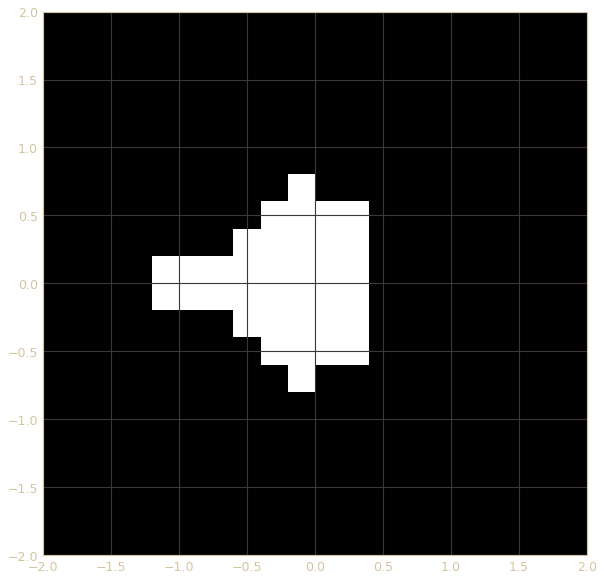

In [8]:
# Conjunto de Mandelbrot - versão de teste

# z and c are complex numbers
def mandelbrot(z,c):
    return z**2+c

iter_num = 100
max_modulus = 2

# The values of x and y go from -grid_size to grid_size
grid_size = 2
grid_steps = 20 # The number of points in each grid axis

# Initialize the arrays
calc_plane = np.empty((grid_steps,grid_steps),complex)
for i,x_value in enumerate(np.linspace(-grid_size,grid_size,grid_steps)):
    for k,y_value in enumerate(np.linspace(-grid_size,grid_size,grid_steps)):
        calc_plane[k,i] = x_value + np.complex(0,y_value)
intermidiate_plane = np.zeros((grid_steps,grid_steps),complex)
display_plane = np.ones((grid_steps,grid_steps),int)


for a in range(iter_num):
    for pos,value in enumerate(calc_plane):
        intermidiate_plane[pos] = intermidiate_plane[pos]**2+value
        for j,k in enumerate(intermidiate_plane[pos]):
            if np.abs(k) > 2: # Still overflows because of 'nan' in np.abs(k)
                display_plane[j,pos] = 0

# Draw the graphs
plt.figure(figsize=(20,10))
plt.imshow(display_plane.T,extent=[-grid_size,grid_size,-grid_size,grid_size])
plt.gray()
plt.show()

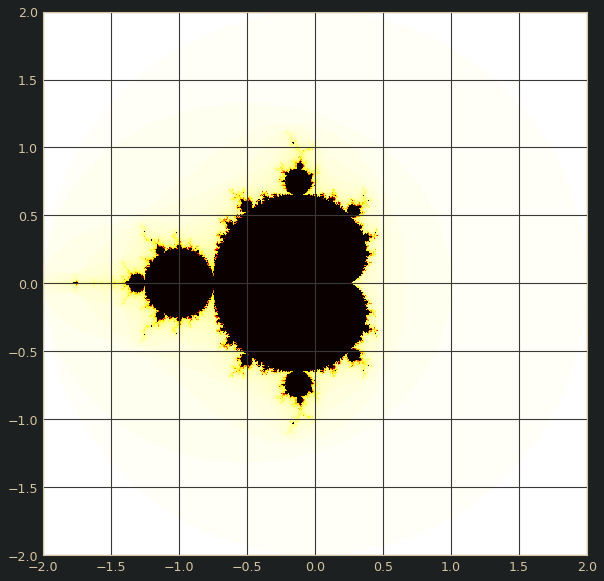

In [198]:
# Conjunto de Mandelbrot - versão 2
# Feio e ineficiente

# z and c are complex numbers
def mandelbrot(z,c):
    return z**2+c

#@jit
# For some reason, @jit doesn't work in this instance, but it doesn't matter, there's a better way to do this
def isdisplay(max_modulus,i):
    for y,line in enumerate(np.abs(intermidiate_plane)):
        for x,mod in enumerate(line):
            if mod > max_modulus or np.isnan(intermidiate_plane[y,x]): # Check for 'nan' to make sure it doesn't overflow
                calc_plane[y,x] = 0
                intermidiate_plane[y,x] = 0
                display_plane[y,x] = 1.25*iter_num - i

iter_num = 100
max_modulus = 2

# The values of x and y go from -grid_size to grid_size
grid_size = 2
grid_steps = 500 # The number of points in each grid axis

calc_plane = np.empty((grid_steps,grid_steps),complex)
for i,x_value in enumerate(np.linspace(-grid_size,grid_size,grid_steps)):
    for k,y_value in enumerate(np.linspace(-grid_size,grid_size,grid_steps)):
        calc_plane[k,i] = x_value + np.complex(0,y_value)
intermidiate_plane = np.zeros((grid_steps,grid_steps),complex)
display_plane = np.zeros((grid_steps,grid_steps),int)

# Iterate iter_num times
for i in range(iter_num):
    intermidiate_plane = intermidiate_plane**2+calc_plane
    isdisplay(calc_plane,intermidiate_plane,display_plane,max_modulus,i)
    print('i = ',i ,end='\r') # Print the current iteration num

# Draw the graph    
plt.figure(figsize=(20,10))
plt.imshow(display_plane,extent=[-grid_size,grid_size,-grid_size,grid_size])
plt.hot()
plt.show()

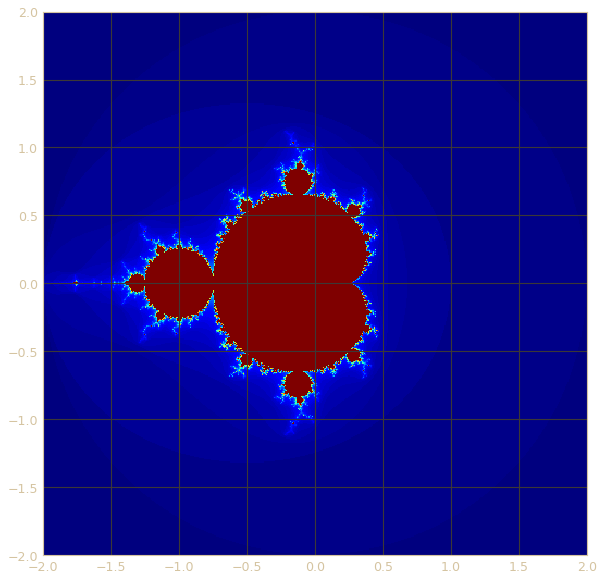

In [9]:
# Conjunto de Mandelbrot - versão 3
# Igual, mas com color scheme diferente, e com 'isdisplay' inline em vez de ser uma função separada

iter_num = 100
max_modulus = 2

# The values of x and y go from -grid_size to grid_size
grid_size = 2
grid_steps = 500 # The number of points in each grid axis

calc_plane = np.empty((grid_steps,grid_steps),complex)
for i,x_value in enumerate(np.linspace(-grid_size,grid_size,grid_steps)):
    for k,y_value in enumerate(np.linspace(-grid_size,grid_size,grid_steps)):
        calc_plane[k,i] = x_value + np.complex(0,y_value)
intermidiate_plane = np.zeros((grid_steps,grid_steps),complex)
display_plane = np.zeros((grid_steps,grid_steps),int) + iter_num

for i in range(iter_num):
    intermidiate_plane = intermidiate_plane**2+calc_plane
    for y in range(len(intermidiate_plane)):
        for x in range(len(intermidiate_plane)):
            if (np.abs(intermidiate_plane[y,x]) > max_modulus)or(np.isnan(intermidiate_plane[y,x])):
                calc_plane[y,x] = 0
                intermidiate_plane[y,x] = np.complex(0,0)
                display_plane[y,x] = i
    print('i = ',i ,end='\r')
    
plt.figure(figsize=(20,10))
plt.imshow(display_plane,extent=[-grid_size,grid_size,-grid_size,grid_size])
plt.jet()
plt.show()

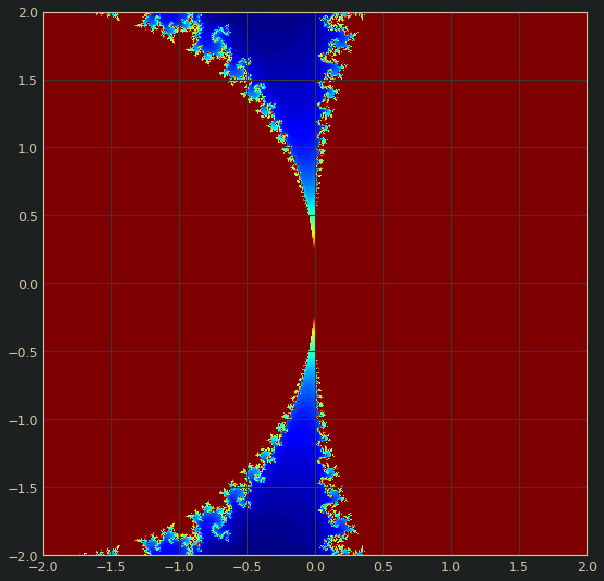

In [211]:
# Conjunto de Mandelbrot - versão 3, zoom

iter_num = 100
max_modulus = 2

# The values of x and y go from -grid_size to grid_size
grid_size = 2
grid_steps = 500 # The number of points in each grid axis

calc_plane = np.empty((grid_steps,grid_steps),complex)
for i,x_value in enumerate(np.linspace(-1,-0.5,grid_steps)): # Zoom in a particular area
    for k,y_value in enumerate(np.linspace(-0.25,0.25,grid_steps)):
        calc_plane[k,i] = x_value + np.complex(0,y_value)
intermidiate_plane = np.zeros((grid_steps,grid_steps),complex)
display_plane = np.zeros((grid_steps,grid_steps),int) + iter_num

for i in range(iter_num):
    intermidiate_plane = intermidiate_plane**2+calc_plane
    for y in range(len(intermidiate_plane)):
        for x in range(len(intermidiate_plane)):
            if (np.abs(intermidiate_plane[y,x]) > max_modulus)or(np.isnan(intermidiate_plane[y,x])):
                calc_plane[y,x] = 0
                intermidiate_plane[y,x] = np.complex(0,0)
                display_plane[y,x] = i
    print('i = ',i ,end='\r')

#print(intermidiate_plane)
    
plt.figure(figsize=(20,10))
plt.imshow(display_plane,extent=[-grid_size,grid_size,-grid_size,grid_size])
plt.jet()
plt.show()

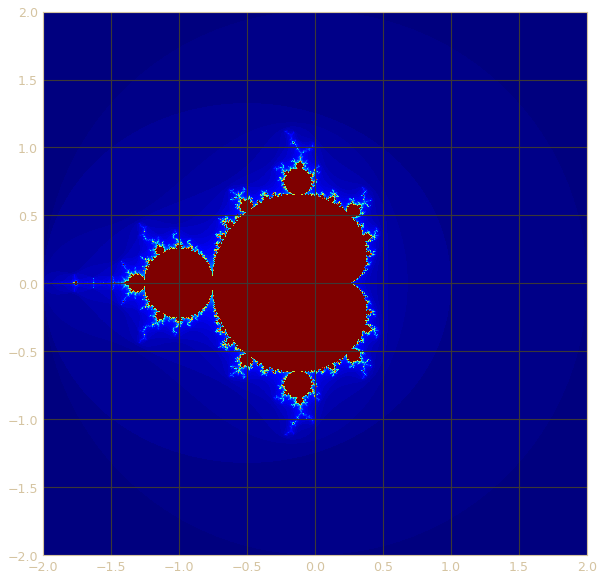

In [13]:
# Conjunto de Mandelbrot, versão 4
# Esta sim é minimamente eficiente

def mandelbrot_numpy(z,c,disp,max_iter):
    """
        Takes z and c as arrays of complex numbers, disp as the display array, and max_iter as the number of iterations
        Iterates max_iter times and puts the apropriate values in disp
    """
    notdone = np.empty(z.shape, dtype = np.bool) # An array for the positions we need to keep iterating
    for i in range(max_iter):
        notdone = np.less(np.abs(z),2) # 1 for no overflow yet, 0 when it overflows, initially empty
        z[notdone] = z[notdone]**2 + c[notdone] # Iterate the positions we need to
        disp[notdone] = i # Set the disp array to the iteration number
    
iter_num = 100

# The values of x and y go from -grid_size to grid_size
grid_size = 2
grid_steps = 5000 # The number of points in each grid axis
    
# Create the c, z, and display arrays
c = np.empty((grid_steps,grid_steps),complex)
for i,x_value in enumerate(np.linspace(-grid_size,grid_size,grid_steps)): # Fill c
    for k,y_value in enumerate(np.linspace(-grid_size,grid_size,grid_steps)):
        c[k,i] = x_value + np.complex(0,y_value)
z = np.zeros((grid_steps,grid_steps),complex)
disp = np.zeros((grid_steps,grid_steps),int) + iter_num

mandelbrot_numpy(z,c,disp,iter_num)

# Draw the graph
plt.figure(figsize=(20,10))
plt.imshow(disp,extent=[-grid_size,grid_size,-grid_size,grid_size])
plt.jet()
plt.show()

<ipython-input-14-9e08ad042f25>:3: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(disp),extent=[-grid_size,grid_size,-grid_size,grid_size])


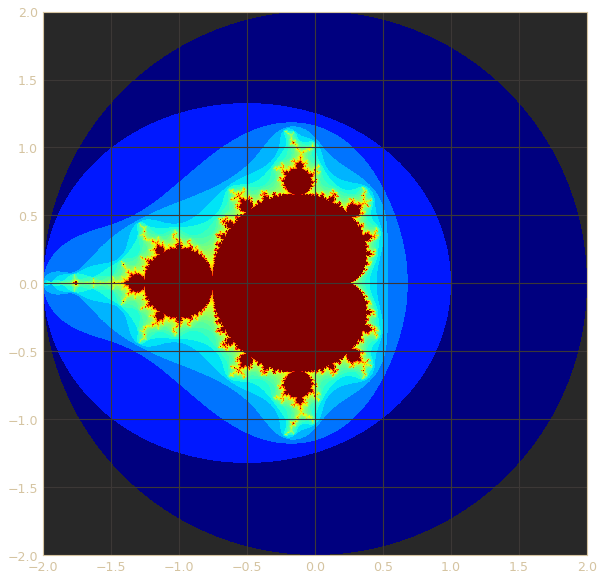

In [14]:
# Graph the log of the number of iterations
plt.figure(figsize=(20,10))
plt.imshow(np.log(disp),extent=[-grid_size,grid_size,-grid_size,grid_size])
plt.jet()
plt.show()